<h1>Introducción al Perceptrón<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Planteamiento-del-problema" data-toc-modified-id="Planteamiento-del-problema-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Planteamiento del problema</a></span></li><li><span><a href="#¿Qué-es-un-perceptrón?" data-toc-modified-id="¿Qué-es-un-perceptrón?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>¿Qué es un perceptrón?</a></span></li><li><span><a href="#Ahora-sin-trampa,-como-logramos-esos-pesos-deseados" data-toc-modified-id="Ahora-sin-trampa,-como-logramos-esos-pesos-deseados-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ahora sin trampa, como logramos esos pesos deseados</a></span></li></ul></div>

## Planteamiento del problema

*Dinero, juventud o tiempo.*

Un problema bastante interesante nos lleva a preguntarnos si preferiamos Juventud, tiempo o dinero. Evidentemete, en los juegos de niños y adolecentes escogemos una de las tres opciones. Vamos a hacerlo más complejo y permitiremos que uno pueda decidir en varios casos. En la tabla siguiente *Juliana* nos comenta con qué le gustaría vivir:

|**Dinero**|**Juventud**|**Tiempo**|**Respuesta**|
|:--:|:--:|:--:|:--:|
|No|Sí|No|*Sí*|
|No|No|Sí|*No*|
|Sí|No|No|*No*|
|Sí|Sí|No|*Sí*|
|Sí|Sí|Sí|*Sí*|
|No|Sí|Sí|*No*|
|No|Sí|No|*Sí*|


Nuestro objetivo ahora es crear un perceptrón que pueda simular la respuesta de Juliana para los casos que hacen falta.

Iniciamos, guardando en dos matrices las respuestas de Juliana, 0 significa `No` y 1 significa `Sí`.

In [1]:
import numpy as np
#Entradas
input_set = np.array([[0,1,0],
                      [0,0,1],
                      [1,0,0],
                      [1,1,0],
                      [1,1,1],
                      [0,1,1],
                      [0,1,0]])
#Salida
labels = np.array([[1,
                    0,
                    0,
                    1,
                    1,
                    0,
                    1]])
labels = labels.reshape(7,1) 

Tabla anterior:

|**Dinero**|**Juventud**|**Tiempo**|**Respuesta**|
|:--:|:--:|:--:|:--:|
|No|Sí|No|*Sí*|
|No|No|Sí|*No*|
|Sí|No|No|*No*|
|Sí|Sí|No|*Sí*|
|Sí|Sí|Sí|*Sí*|
|No|Sí|Sí|*No*|
|No|Sí|No|*Sí*|

Ahora en numpy:

In [2]:
np.concatenate((input_set,labels),axis=1)

array([[0, 1, 0, 1],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 1, 0, 1],
       [1, 1, 1, 1],
       [0, 1, 1, 0],
       [0, 1, 0, 1]])

## ¿Qué es un perceptrón?

![Perceptron](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Perceptr%C3%B3n_5_unidades.svg/800px-Perceptr%C3%B3n_5_unidades.svg.png)

*Tomada de [Wikipedia](https://es.wikipedia.org/wiki/Perceptr%C3%B3n)*

El objetivo de un perceptrón es establecer unos pesos $w=(w_1,w_2,\cdots,w_n)$ y un valor de sesgo $b$ que satisfaga lo siguiente:

$$\hat{y}=\begin{cases} 1, \text{ si } w\cdot x=\sum\limits_{i=1}^{n}w_i\cdot x_i>b\\
0, \text{ en otro caso.}\end{cases}$$

La activación del perceptron (tomar valores 0 o 1) puede depender tambien de una función de activación.

**Problema Inicial**

En nuestro problema:

$$w=(0.178,0.785,-0.321)$$
$$b=0.5$$


In [3]:
np.concatenate((input_set,labels),axis=1)

array([[0, 1, 0, 1],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 1, 0, 1],
       [1, 1, 1, 1],
       [0, 1, 1, 0],
       [0, 1, 0, 1]])

In [4]:
w=np.array([0.17857143,0.78571429,-0.32142857])
b=0.5

In [5]:
input_set

array([[0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 1, 0],
       [1, 1, 1],
       [0, 1, 1],
       [0, 1, 0]])

In [6]:
Respuestas=input_set@w
Respuestas

array([ 0.78571429, -0.32142857,  0.17857143,  0.96428572,  0.64285715,
        0.46428572,  0.78571429])

In [11]:
[1 if i> 0.5 else 0 for i in Respuestas]

[1, 0, 0, 1, 1, 0, 1]

**Definimos la función de activación de salto** que a partir de 0.5 tomara como valor de salida 1, y en otro caso 0.

$$\hat{y}=\begin{cases} 1, \text{ si } w\cdot x=\sum\limits_{i=1}^{n}w_i\cdot x_i>b\\
0, \text{ en otro caso.}\end{cases}$$

In [10]:
def funcion_activacion(w,x,b):
    if w[0]*x[0]+w[1]*x[1]+w[2]*x[2]>b:
        r=1
    else:
        r=0
    return r

In [11]:
y1=[]
for i in input_set:
    y1.append(funcion_activacion(w,i,b))
print(y1)
print(labels.T[0])

[1, 0, 0, 1, 1, 0, 1]
[1 0 0 1 1 0 1]


In [12]:
funcion_activacion(w,[1,0,1],b)

0

## Ahora sin trampa, como logramos esos pesos deseados

El ejercicio inicia con unos pesos aleatorios que irán mejorando de acuerdo a una función de error que busca un mínimo siguiendo la dirección de un vector en dirección de su gradiente negativo:

**Definimos pesos** 

*Totalmente aleatorio*

In [13]:
weights = np.random.rand(3,1)
weights

array([[0.45193304],
       [0.21156884],
       [0.63648653]])

**Sesgo**

*También aleatorio*

In [31]:
bias = np.random.rand()
bias

0.694552691741222

In [32]:
y1=[]
for i in input_set:
    y1.append(funcion_activacion(weights,i,bias))
print(y1)
print(labels.T[0])

[1, 0, 1, 1, 1, 1, 1]
[1 0 0 1 1 0 1]


**Tasa de aprendizaje**
Que tan rápido buscaremos el mínimo, no puede ser tan grande.


In [33]:
lr = 0.05 

**Función de activación**

Las derivadas de la función mencionada anteriormente pueden generar conflictos, no nos compliquemos, utilicemos la bella función sigmoide, una generalización de la función logística:

In [34]:
def sigmoid(x):
    return 1/(1+np.exp(-x))


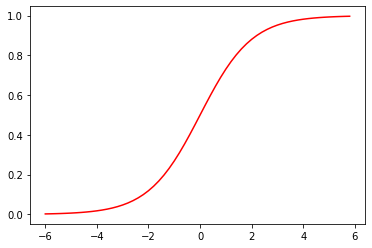

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
t = np.arange(-6., 6., 0.2)

plt.plot(t, sigmoid(t), 'r')
plt.show()

Usaremos la derivada de la función, veamos un gráfico:

In [36]:
def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

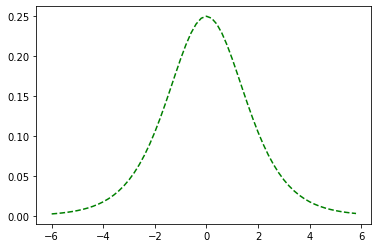

In [37]:
t = np.arange(-6., 6., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, sigmoid_derivative(t), 'g--')
plt.show()

Ahora veamos las dos:

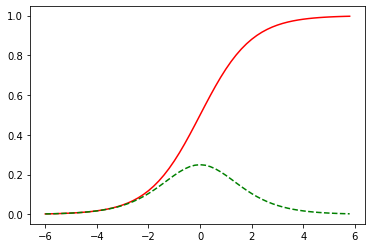

In [38]:
t = np.arange(-6., 6., 0.2)

plt.plot(t,sigmoid(t), 'r-', t,sigmoid_derivative(t), 'g--')
plt.show()

Usando un poco de cálculo vectorial podemos determinar el gradiente de la función que expresa el error obtenido con los pesos que propusimos. Seguimos la dirección negativa del gradiente y buscamos el mínimo error, aquí vemos la actualización de pesos:

In [39]:
for epoch in range(500):
    inputs = input_set
    XW = np.dot(inputs, weights)+ bias
    z = sigmoid(XW)
    error = z - labels
    dcost = error
    dpred = sigmoid_derivative(z)
    z_del = dcost * dpred
    inputs = input_set.T
    weights = weights - lr*np.dot(inputs, z_del)
    for num in z_del:
        bias = bias - lr*num
    print('epoch '+str(epoch)+', new weights: '+str(weights), 'new bias: '+str(bias))
    print('epoch '+str(epoch)+' new labels', z)
        
print(labels.T[0])
print(weights)
print(bias)
print(error.sum())

epoch 0, new weights: [[ 1.45809986]
 [ 4.86030802]
 [-2.87301845]] new bias: [0.67480388]
epoch 0 new labels [[0.99618162]
 [0.10267404]
 [0.89675889]
 [0.99911697]
 [0.98476575]
 [0.9371263 ]
 [0.99618162]]
epoch 1, new weights: [[ 1.44905768]
 [ 4.85109026]
 [-2.88356842]] new bias: [0.65513088]
epoch 1 new labels [[0.99606974]
 [0.09991094]
 [0.89406035]
 [0.99908275]
 [0.98401819]
 [0.93475246]
 [0.99606974]]
epoch 2, new weights: [[ 1.44004139]
 [ 4.8418976 ]
 [-2.89406258]] new bias: [0.63553405]
epoch 2 new labels [[0.995955  ]
 [0.0972257 ]
 [0.89130962]
 [0.99904732]
 [0.98323756]
 [0.93230532]
 [0.995955  ]]
epoch 3, new weights: [[ 1.43105177]
 [ 4.832731  ]
 [-2.90450098]] new bias: [0.61601384]
epoch 3 new labels [[0.99583735]
 [0.09461635]
 [0.88850648]
 [0.99901065]
 [0.98242265]
 [0.92978354]
 [0.99583735]]
epoch 4, new weights: [[ 1.42208962]
 [ 4.8235914 ]
 [-2.91488364]] new bias: [0.59657072]
epoch 4 new labels [[0.99571672]
 [0.09208095]
 [0.88565078]
 [0.9989727 

Con esos nuevos pesos determinamos los resultados de salida de nuestro perceptron con esos pesos:

In [40]:
inputs

array([[0, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 1, 1, 1, 1],
       [0, 1, 0, 0, 1, 1, 0]])

In [41]:
input_set

array([[0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 1, 0],
       [1, 1, 1],
       [0, 1, 1],
       [0, 1, 0]])

In [42]:
result=[]
for i in range(7):
    single_pt = input_set[i]
    result.append(sigmoid(np.dot(single_pt, weights) + bias))
print(result)

def salida(x):
    if x>0.5:
        r=1
    else:
        r=0
    return r
[salida(i) for i in result]

[array([0.94565814]), array([0.00429694]), array([0.29165466]), array([0.98069596]), array([0.60852702]), array([0.34745676]), array([0.94565814])]


[1, 0, 0, 1, 1, 0, 1]

Que efectivamente es igual a los resultados deseados:

In [29]:
labels.T

array([[1, 0, 0, 1, 1, 0, 1]])

In [30]:
salida(sigmoid(np.dot([0,0,0], weights) + bias))

0